<a href="https://colab.research.google.com/github/YuliyaMilk/IS_1/blob/master/IS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install currencyconverter
import pandas as pd
from matplotlib import pyplot
from currency_converter import CurrencyConverter

     |████████████████████████████████| 532 kB 6.5 MB/s 


In [21]:
table = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')

1.Вывести: кол-во наблюдений в датасете

In [24]:
table.shape[0]

4622

2.Вывести названия столбцов

In [25]:
table.columns.tolist()

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

3.Определить самую частую позицию (item) в заказе 

In [26]:
table.groupby('item_name')['quantity'].sum().idxmax(), table.groupby('item_name')['quantity'].sum().max()

('Chicken Bowl', 761)

4. Построить гистрограмму частоты заказов по позициям (item)

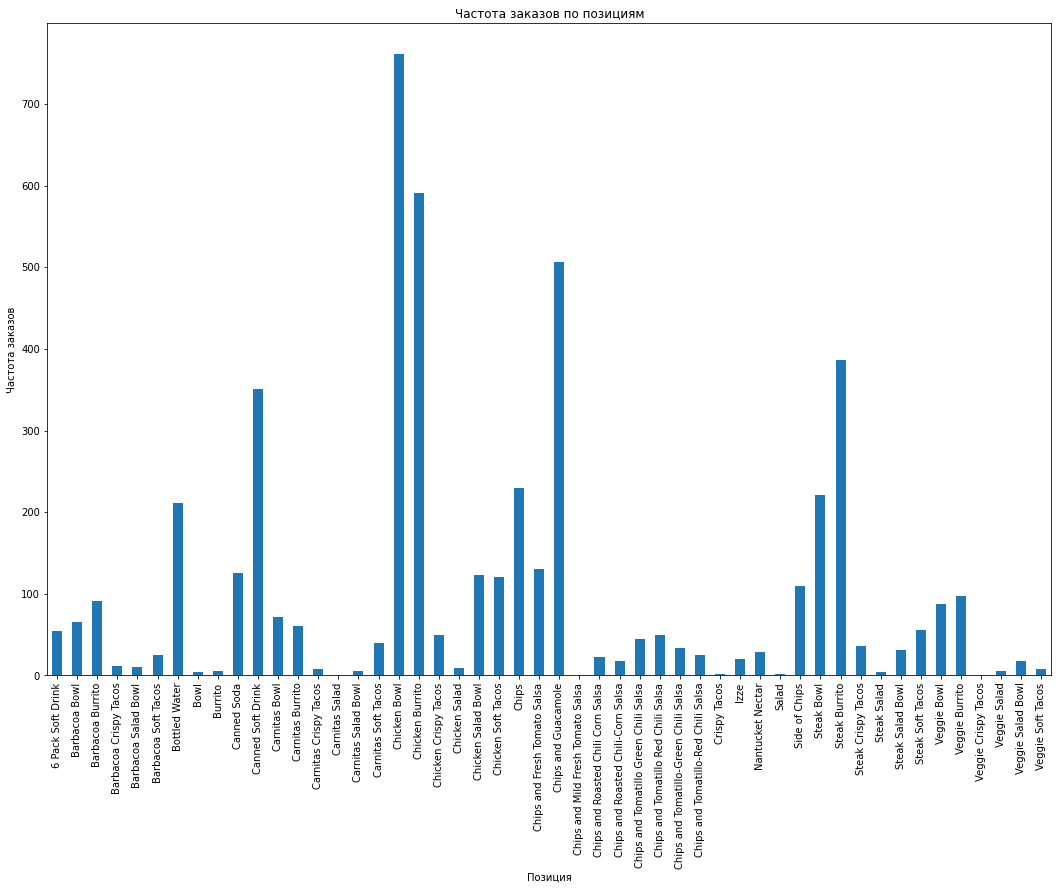

In [27]:
order = table.groupby('item_name')['quantity'].sum()
order.plot(kind='bar', figsize=(18, 12))
pyplot.xlabel('Позиция')
pyplot.ylabel('Частота заказов')
pyplot.title('Частота заказов по позициям')
pyplot.show()

5. Измените тип переменной item_price c с помощью лямбды функции

In [28]:
fun=lambda x:float(x.strip('$'))
table['item_price'] = table['item_price'].apply(fun)
table

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

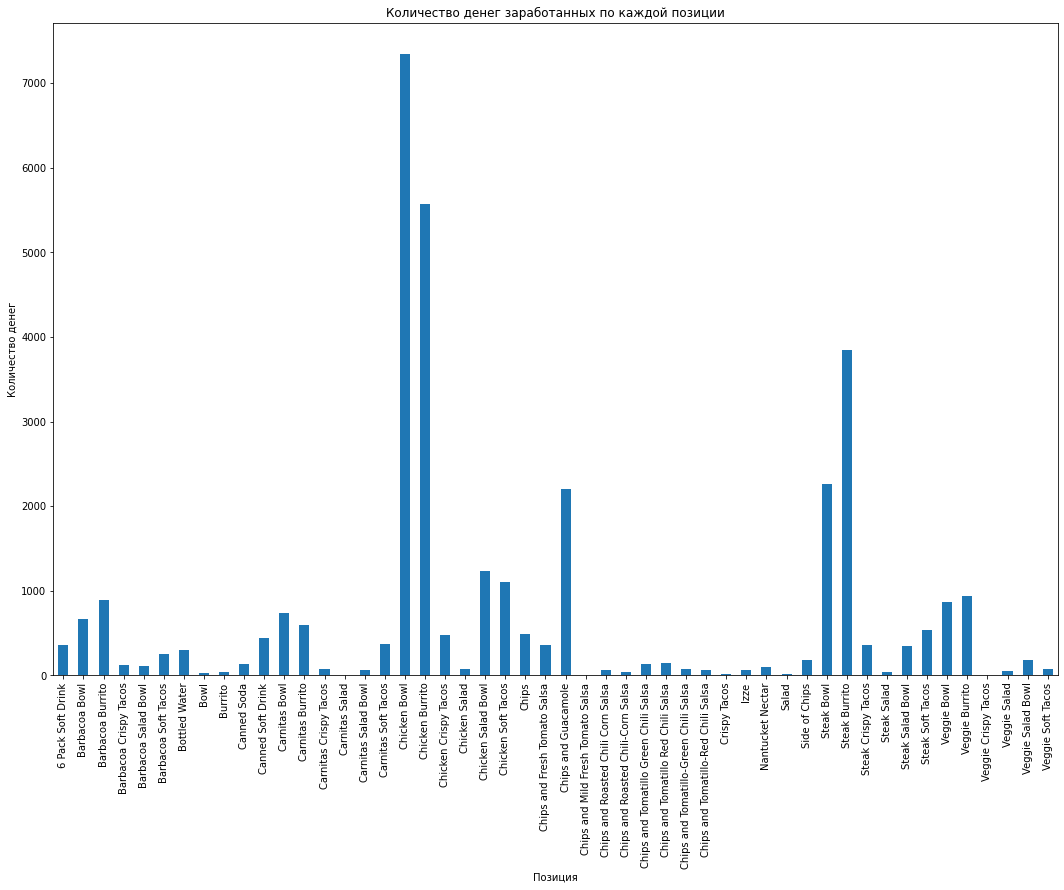

In [29]:
item_price = pd.to_numeric(table['item_price'])
table.groupby('item_name')['item_price'].sum().plot(kind='bar', figsize=(18, 12))
pyplot.xlabel('Позиция')
pyplot.ylabel('Количество денег')
pyplot.title('Количество денег заработанных по каждой позиции')
pyplot.show()

7. Средняя сумма заказа? (минимум 2 способа)

In [30]:
total_order_sum = table['item_price'].sum()
num_orders = len(set(table['order_id']))
average_order_price = round(total_order_sum / num_orders, 2)  
print('1 способ:', average_order_price)

print('2 способ:', round(table.groupby('order_id')['item_price'].sum().mean(), 2))

1 способ: 18.81
2 способ: 18.81


8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [31]:
num_orders = len(set(table['order_id']))
print('Среднее = ', round(table.groupby('order_id').item_name.nunique().sum() / num_orders, 2))
print('Минимальное = ', table.groupby('order_id').item_name.nunique().min())
print('Максимальное = ', table.groupby('order_id').item_name.nunique().max())
print('Медианное = ', table.groupby('order_id').item_name.nunique().median())

Среднее =  2.34
Минимальное =  1
Максимальное =  8
Медианное =  2.0


9. Определить статистику заказов стейков, а также статистику заказов прожарки.

In [32]:
item_tot = table[table['item_name'].str.contains('Steak')].groupby(['item_name']).agg({"item_price": "mean", "quantity": "sum", "order_id": "count"}).reset_index()
item_tot = item_tot.rename(
    columns={"item_price": "avg_price_paid", "order_id": "times_ordered"}
)
item_tot


,item_name,avg_price_paid,quantity,times_ordered
0,Steak Bowl,10.711801,221,211
1,Steak Burrito,10.465842,386,368
2,Steak Crispy Tacos,10.209714,36,35
3,Steak Salad,8.915000,4,4
4,Steak Salad Bowl,11.847931,31,29
5,Steak Soft Tacos,9.746364,56,55


In [33]:
item_stat = table[table['item_name'].str.contains('Steak')].groupby('item_name')['quantity', 'item_price'].describe()
item_stat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


quantity                      ... item_price              
                      count      mean       std  ...        50%    75%    max
item_name                                        ...                         
Steak Bowl            211.0  1.047393  0.234278  ...       9.25  11.75  26.07
Steak Burrito         368.0  1.048913  0.239889  ...       9.25  11.75  27.75
Steak Crispy Tacos     35.0  1.028571  0.169031  ...       9.25  11.75  17.98
Steak Salad             4.0  1.000000  0.000000  ...       8.99   8.99   8.99
Steak Salad Bowl       29.0  1.068966  0.257881  ...      11.89  11.89  23.78
Steak Soft Tacos       55.0  1.018182  0.134840  ...       9.25   9.25  18.50

[6 rows x 16 columns]

In [34]:
item_tot = table['choice_description'].str.split(expand=True).stack().reset_index(level=1, drop=True).to_frame('roasting').merge(table, left_index=True, right_index=True)
item_tot = item_tot[item_tot['roasting'].str.contains('Mild|Medium|Hot')]
item_tot['roasting'] = item_tot.roasting.str.strip(',[]()')
item_tot = item_tot.groupby(['roasting']).agg({"quantity": "sum", "order_id": "count", "item_price": "mean",}).reset_index()
item_tot = item_tot.rename(
    columns={"order_id": "times_ordered", "item_price": "avg_price_paid", }
)
item_tot

,roasting,quantity,times_ordered,avg_price_paid
0,Hot,275,262,9.750802
1,Medium,425,403,9.764739
2,Mild,405,382,9.821073


In [39]:
item_stat = table['choice_description'].str.split(expand=True).stack().reset_index(level=1, drop=True).to_frame('roasting').merge(table, left_index=True, right_index=True)
item_stat = item_stat[item_stat['roasting'].str.contains('Mild|Medium|Hot')]
item_stat['roasting'] = item_stat.roasting.str.strip(',[]()')
item_stat = item_stat.groupby('roasting')['quantity', 'item_price'].describe()
item_stat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


quantity                                ... item_price                          
            count      mean       std  min  25%  ...        min   25%   50%    75%    max
roasting                                         ...                                     
Hot         262.0  1.049618  0.217571  1.0  1.0  ...       8.19  8.49  8.99   8.99  22.96
Medium      403.0  1.054591  0.258194  1.0  1.0  ...       8.19  8.49  8.99   8.99  32.94
Mild        382.0  1.060209  0.248962  1.0  1.0  ...       8.19  8.49  8.99  10.98  32.94

[3 rows x 16 columns]

10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [40]:
c = CurrencyConverter()
fun1=lambda x:(str(round((c.convert(pd.to_numeric(x), 'USD', 'RUB')), 2))+' RUB')
table['price_rubles'] = table['item_price'].apply(fun1)
table

,order_id,quantity,item_name,choice_description,item_price,price_rubles
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,171.32 RUB
1,1,1,Izze,[Clementine],3.39,243.0 RUB
2,1,1,Nantucket Nectar,[Apple],3.39,243.0 RUB
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,171.32 RUB
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1217.13 RUB
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,842.25 RUB
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,842.25 RUB
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,806.41 RUB
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,627.2 RUB


11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.

In [41]:
group_order = pd.DataFrame(
    table.groupby(['item_name', 'order_id'])
    .agg({"item_price": "mean", "quantity": "count"})
)
group_order

item_price  quantity
item_name         order_id                      
6 Pack Soft Drink 129             6.49         1
                  148             6.49         1
                  154             6.49         1
                  168             6.49         1
                  182             6.49         1
...                                ...       ...
Veggie Soft Tacos 567             8.49         1
                  688            11.25         1
                  948             8.75         1
                  1132            8.49         1
                  1559           16.98         1

[4292 rows x 2 columns]

In [42]:
item_tot = table['choice_description'].str.split(expand=True).stack().reset_index(level=1, drop=True).to_frame('roasting').merge(table, left_index=True, right_index=True)
item_tot = item_tot[item_tot['roasting'].str.contains('Mild|Medium|Hot')]
item_tot['roasting'] = item_tot.roasting.str.strip(',[]()')
item_tot = item_tot[item_tot['item_name'].str.contains('Steak')].groupby(['roasting', 'order_id', 'item_name', 'choice_description']).agg({"item_price": "mean", "quantity": "count"})
item_tot

item_price  quantity
roasting order_id item_name        choice_description                                                      
Hot      21       Steak Burrito    [Tomatillo-Red Chili Salsa (Hot), [Rice, Fajita...        8.99         1
         22       Steak Burrito    [[Fresh Tomato Salsa (Mild), Roasted Chili Corn...        8.99         1
         29       Steak Burrito    [Tomatillo-Red Chili Salsa (Hot), [Black Beans,...        8.99         1
                  Steak Soft Tacos [Tomatillo-Red Chili Salsa (Hot), [Rice, Cheese...        8.99         1
         30       Steak Burrito    [Tomatillo-Red Chili Salsa (Hot), [Rice, Cheese]]         8.99         1
...                                                                                           ...       ...
Mild     1552     Steak Soft Tacos [[Fresh Tomato Salsa (Mild), Tomatillo-Green Ch...        8.99         1
         1585     Steak Burrito    [[Fresh Tomato Salsa (Mild), Tomatillo-Red Chil...        8.99         1
         1605     Steak Burrito    [[Fresh Tomato Salsa (Mild), Tomatillo-Red Chil...        8.99         1
         1612     Steak Bowl       [Fresh Tomato Salsa (Mild), [Black Beans, Rice,...        8.99         1
         1623     Steak Bowl       [Fresh Tomato Salsa (Mild), [Sour Cream, Lettuc...        8.99         1

[300 rows x 2 columns]

12. Определить цену по каждой позиции в отдельности. 

In [45]:
table['one_item_price'] = round(table['item_price'] / table['quantity'], 2)
table1 = table.groupby([ 'item_name', 'one_item_price']).agg({"quantity": "count"})
table1

quantity
item_name         one_item_price          
6 Pack Soft Drink 6.49                  54
Barbacoa Bowl     8.69                   3
                  8.99                   8
                  9.25                  28
                  11.48                  6
...                                    ...
Veggie Salad Bowl 8.75                   8
                  11.25                 10
Veggie Soft Tacos 8.49                   3
                  8.75                   2
                  11.25                  2

[136 rows x 1 columns]

In [46]:
table.groupby(['item_name']).agg({'one_item_price': lambda x: x.unique()})

,one_item_price
item_name,
6 Pack Soft Drink,6.49
Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]"
Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]"
Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]"
Barbacoa Salad Bowl,"[11.89, 9.39]"
Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]"
Bottled Water,"[1.09, 1.5]"
Bowl,7.4
Burrito,7.4
